Extracting EDF parameters from t:\GITHUB\DATA_ANALYSIS_TOOLS\1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 143999  =      0.000 ...  1124.992 secs...
Duration of the recording: 1124.9921875 seconds
EEG Channels: ['TIME_STAMP_s', 'TIME_STAMP_ms', 'OR_TIME_STAMP_s', 'OR_TIME_STAMP_ms', 'COUNTER', 'INTERPOLATED', 'Cz', 'Fz', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5', 'FT9', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO9', 'O1', 'Pz', 'Oz', 'O2', 'PO10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'FT10', 'FC6', 'C4', 'FC2', 'F4', 'F8', 'Fp2', 'HighBitFlex', 'SaturationFlag', 'RAW_CQ', 'BATTERY', 'BATTERY_PERCENT', 'MarkerIndex', 'MarkerType', 'MarkerValueInt', 'MARKER_HARDWARE', 'CQ_Cz', 'CQ_Fz', 'CQ_Fp1', 'CQ_F7', 'CQ_F3', 'CQ_FC1', 'CQ_C3', 'CQ_FC5', 'CQ_FT9', 'CQ_T7', 'CQ_CP5', 'CQ_CP1', 'CQ_P3', 'CQ_P7', 'CQ_PO9', 'CQ_O1', 'CQ_Pz', 'CQ_Oz', 'CQ_O2', 'CQ_PO10', 'CQ_P8', 'CQ_P4', 'CQ_CP2', 'CQ_CP6', 'CQ_T8', 'CQ_FT10', 'CQ_FC6', 'CQ_C4', 'CQ_FC2', 'CQ_F

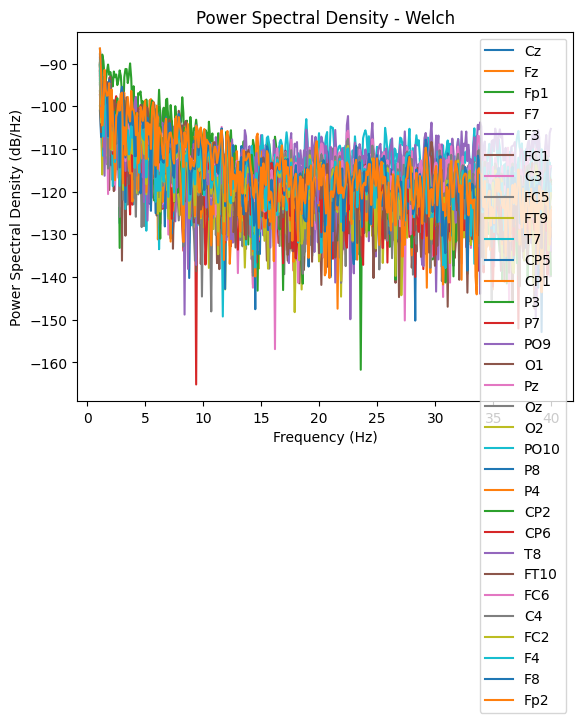

    Using multitaper spectrum estimation with 7 DPSS windows


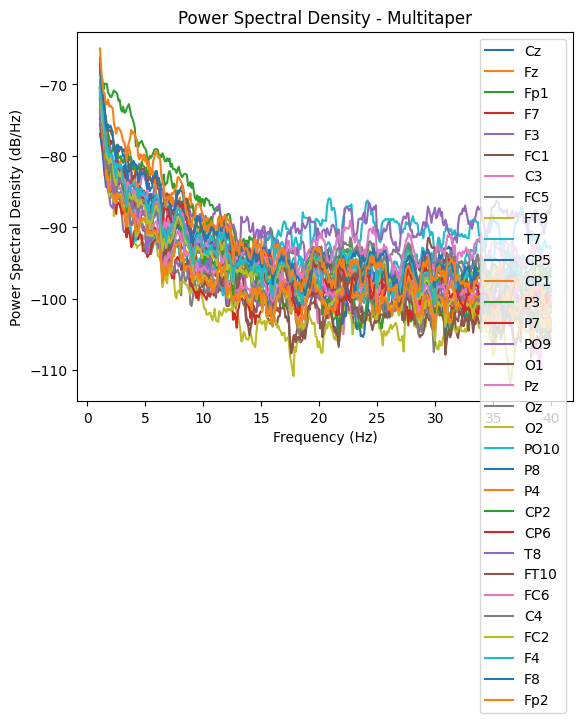

Effective window size : 16.000 (s)
converting legacy list-of-tuples input to a dict for the `bands` parameter


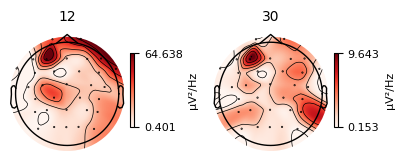

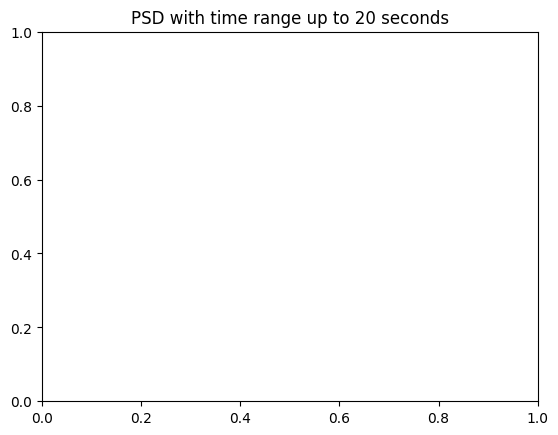

In [4]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# Read your EDF file
raw = mne.io.read_raw_edf('1.edf', preload=True)

# Define EEG channels
eeg_channels = ['Cz', 'Fz', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5', 'FT9', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO9', 'O1', 'Pz', 'Oz', 'O2', 'PO10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'FT10', 'FC6', 'C4', 'FC2', 'F4', 'F8', 'Fp2']

# Adjust parameters
fmin, fmax = 1, 40  # Frequency range for PSD calculation
tmin, tmax = 10, 20  # Time range for PSD calculation
n_fft = 2**9  # the FFT size (n_fft). Ideally a power of 2

# Define PSD methods
psd_methods = ['welch', 'multitaper']  # Add more methods as needed

# Set up the 10-20 montage
montage = mne.channels.make_standard_montage('standard_1020')

# Set the montage for the raw data, ignoring missing channels
raw.set_montage(montage, on_missing='ignore')

# Check the duration of the recording
duration = raw.times[-1]
print("Duration of the recording:", duration, "seconds")

# Print EEG channels
print("EEG Channels:", raw.info['ch_names'])

# Ensure tmax is within the duration of the recording
if tmax > duration:
    print("Error: tmax exceeds the duration of the recording.")
else:
    # Plot PSD for each method
    for method in psd_methods:
        # Compute PSD using the specified method for selected EEG channels
        psd_result = raw.compute_psd(method=method, tmin=tmin, tmax=tmax, 
        fmin=fmin, fmax=fmax, picks=eeg_channels,remove_dc=True,
        reject_by_annotation=True, verbose=None)

        # Extract PSD and frequencies
        psds, freqs = psd_result.data, psd_result.freqs

        # Calculate frequency bin width
        delta_f = freqs[1] - freqs[0]

        # Normalize PSD by frequency bin width and convert to dB/Hz
        psds_dbhz = 10 * np.log10(psds)

        # Plot PSD for the current method
        plt.figure()
        for i, channel in enumerate(eeg_channels):
            plt.plot(freqs, psds_dbhz[i], label=channel)
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Power Spectral Density (dB/Hz)')
        plt.title('Power Spectral Density - ' + method.capitalize())
        plt.legend(loc='upper right')
        plt.show()

    # Plot topomap for PSD using specific time range (Welch method)
    psd_result = raw.compute_psd(tmax=tmax, picks=eeg_channels)
    psd_result.plot_topomap(bands=[(8, 12), (13, 30)], ch_type='eeg')
    plt.title('PSD with time range up to {} seconds'.format(tmax))
    plt.show()


Extracting EDF parameters from t:\GITHUB\DATA_ANALYSIS_TOOLS\1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 143999  =      0.000 ...  1124.992 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.

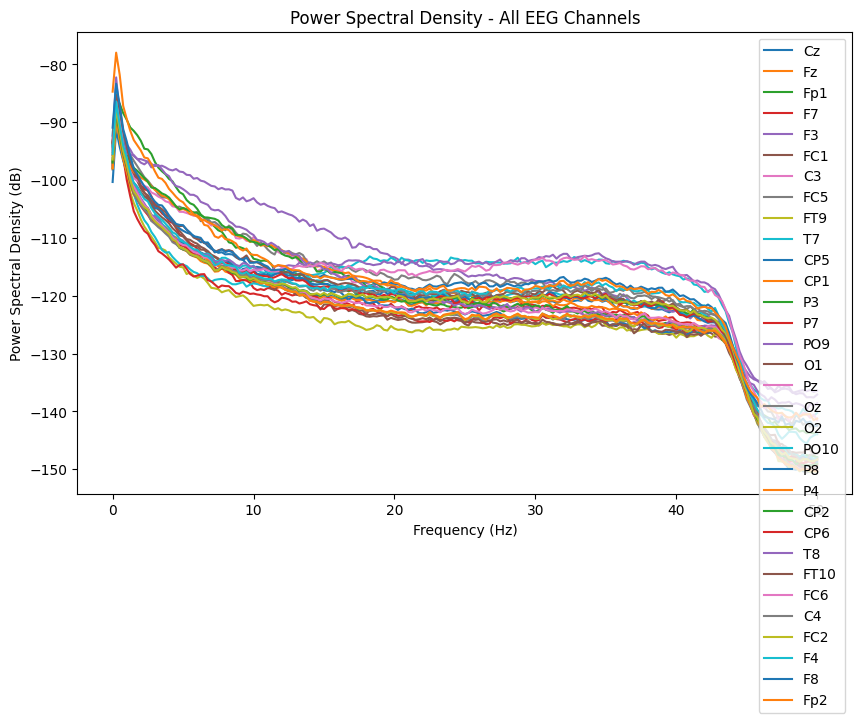

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)


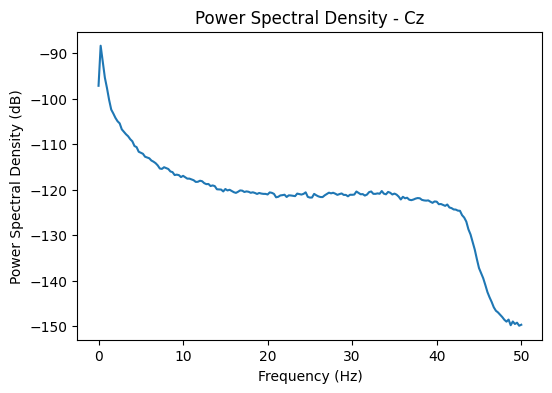

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)


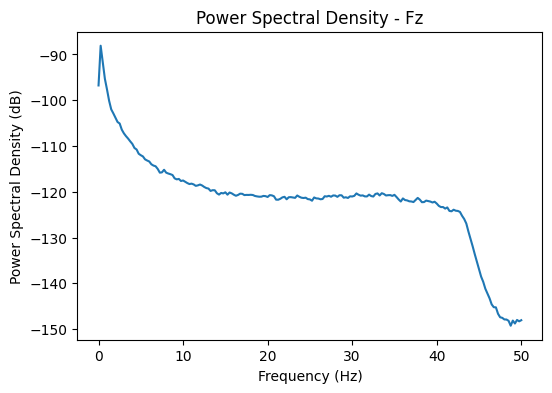

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)


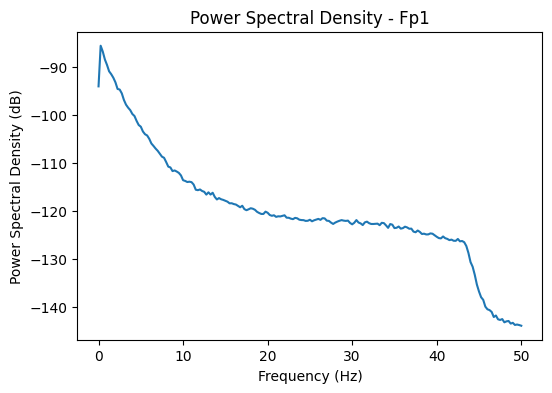

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)


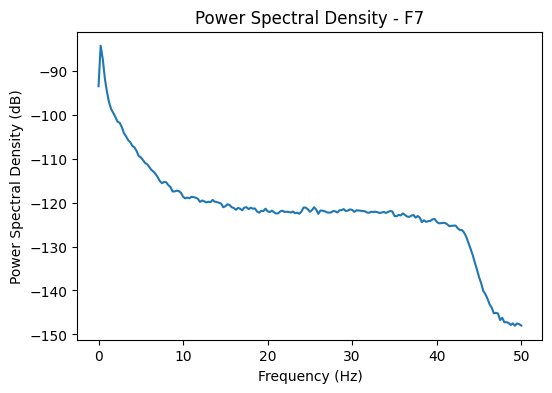

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)


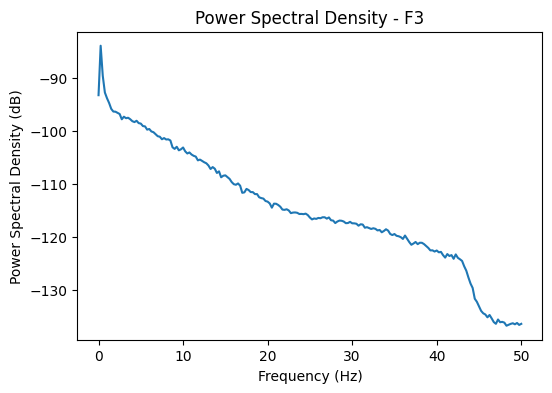

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)


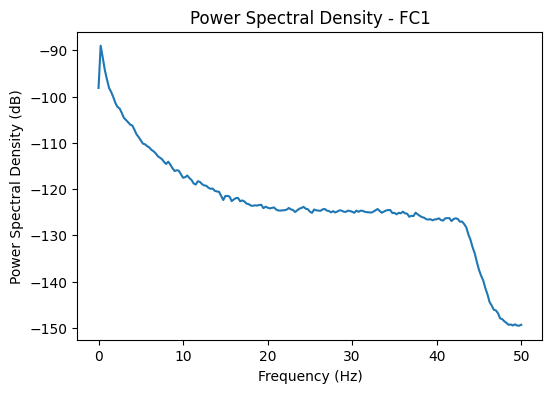

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)


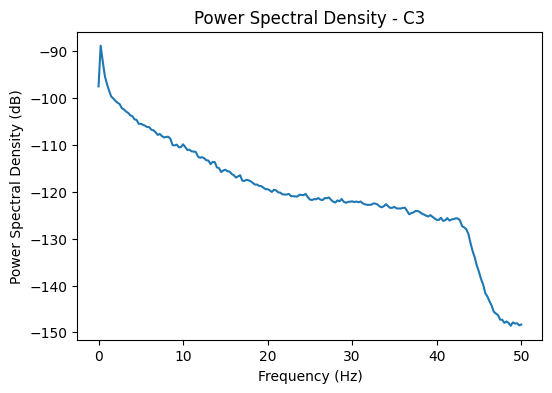

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)


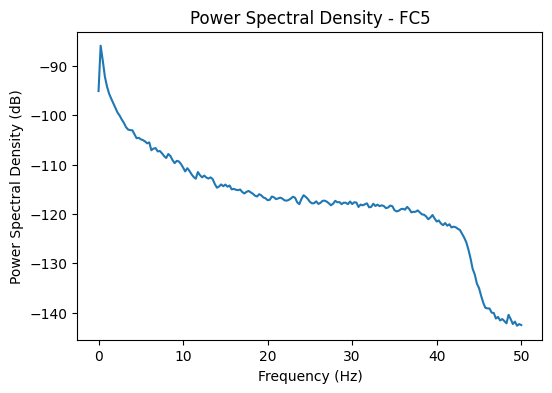

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)


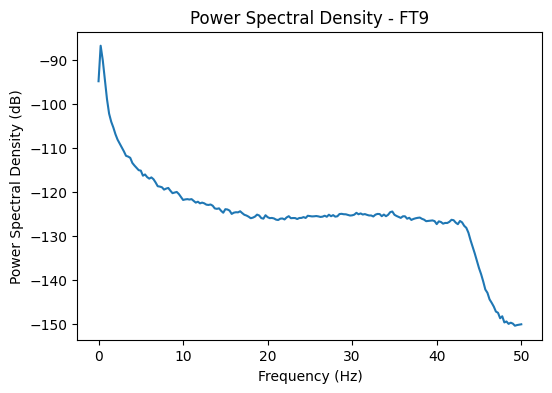

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)


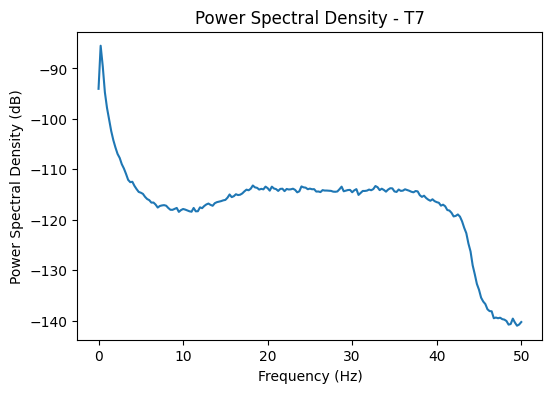

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)


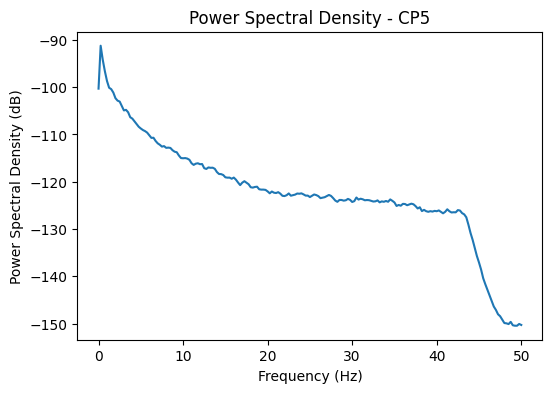

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)


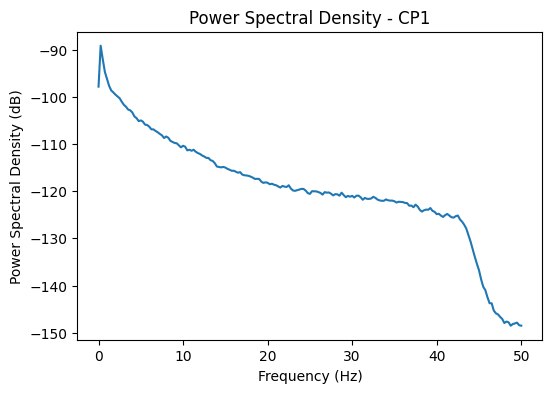

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)


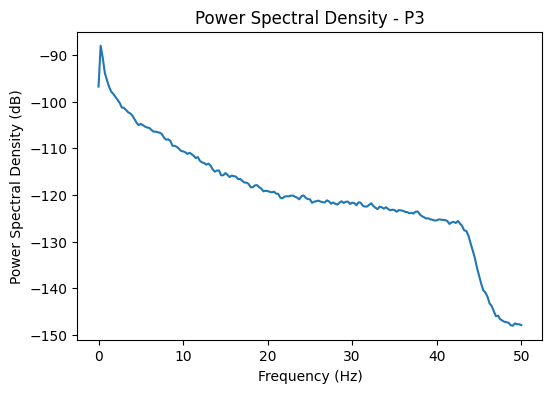

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)


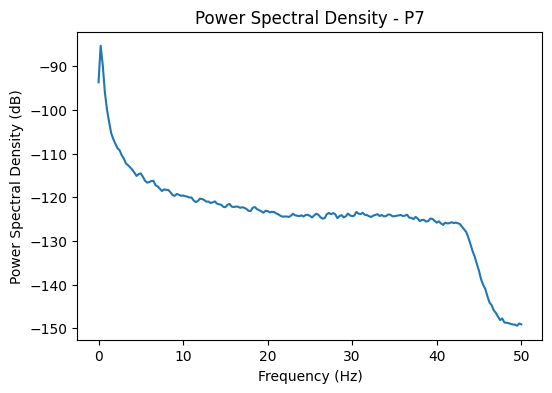

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)


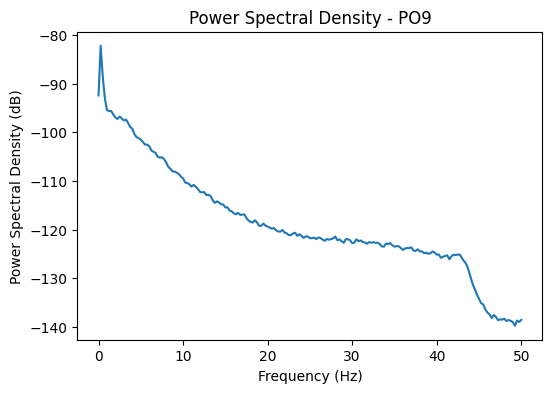

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)


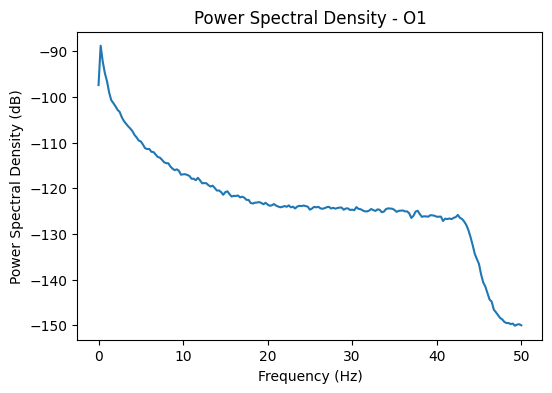

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)


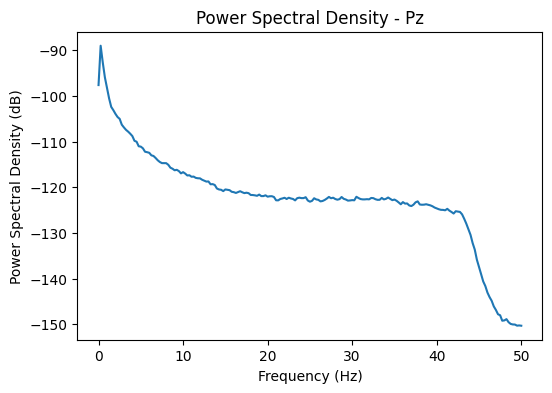

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)


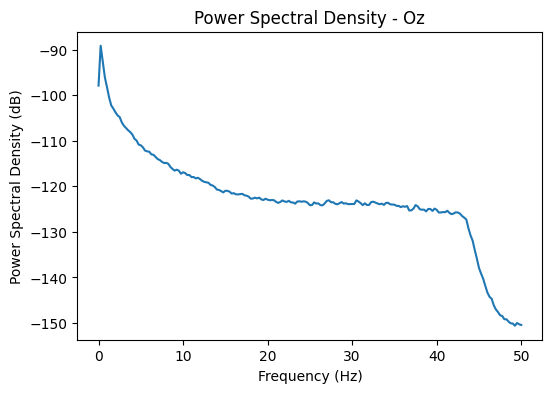

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)


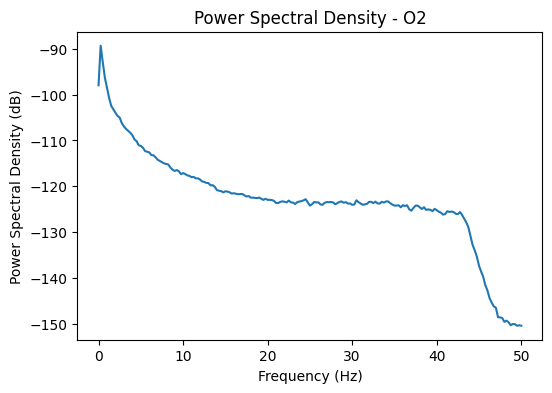

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)


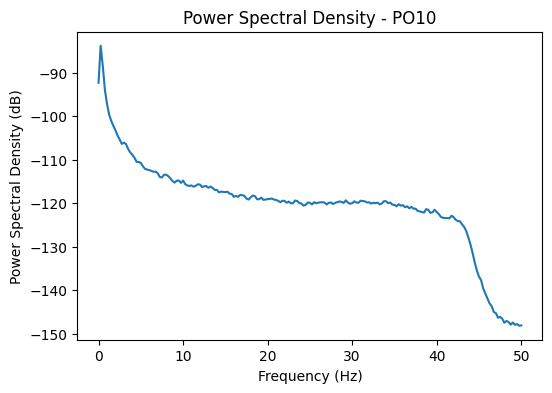

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)


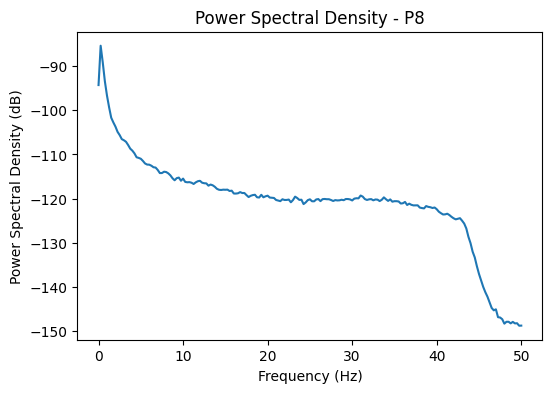

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)


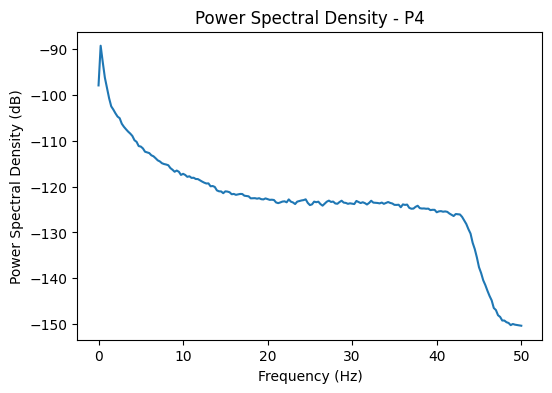

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)


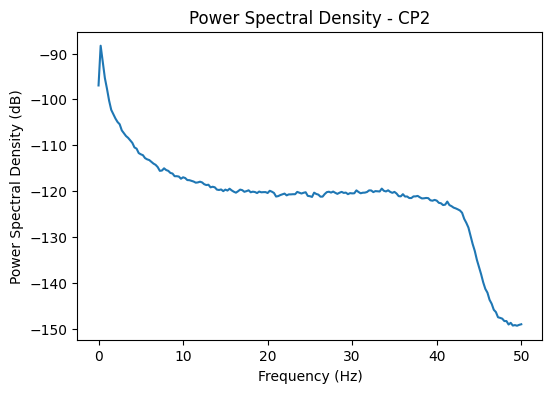

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)


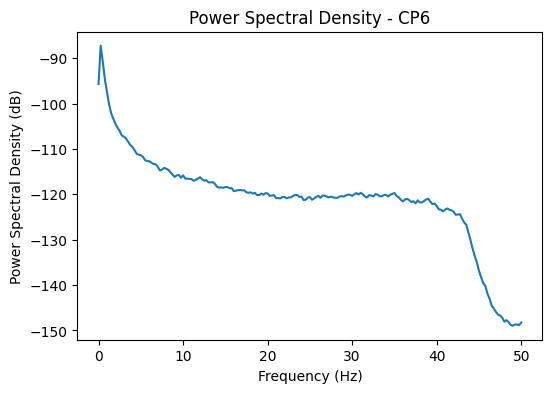

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)


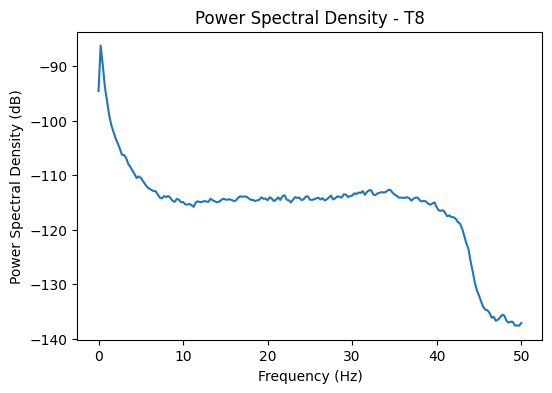

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)


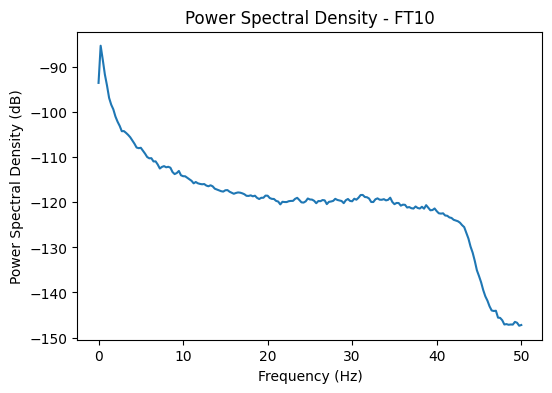

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)


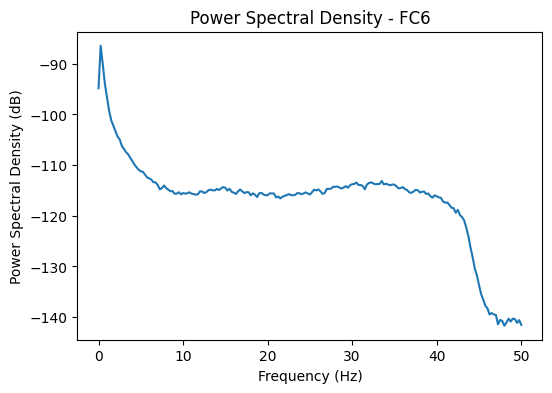

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)


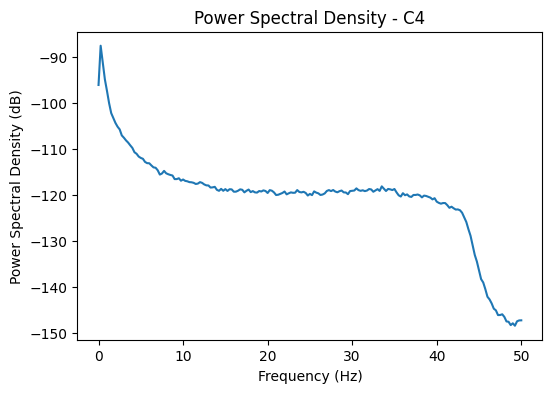

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)


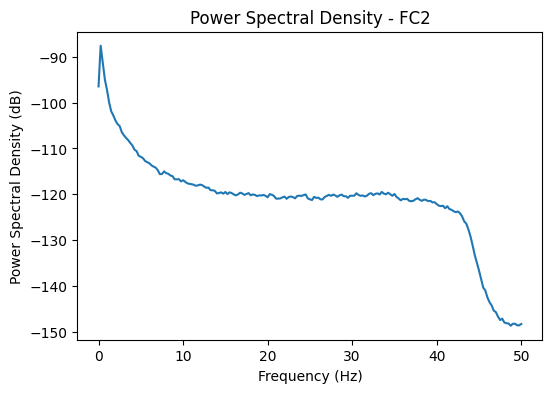

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)


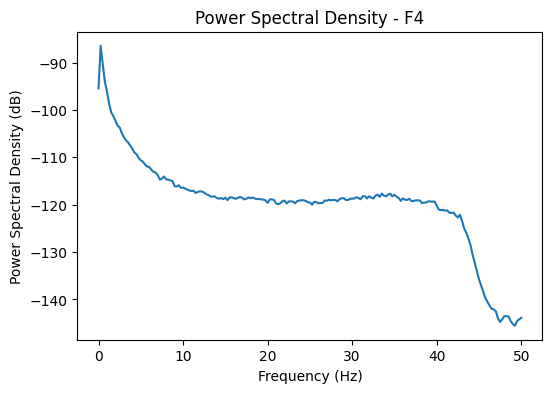

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)


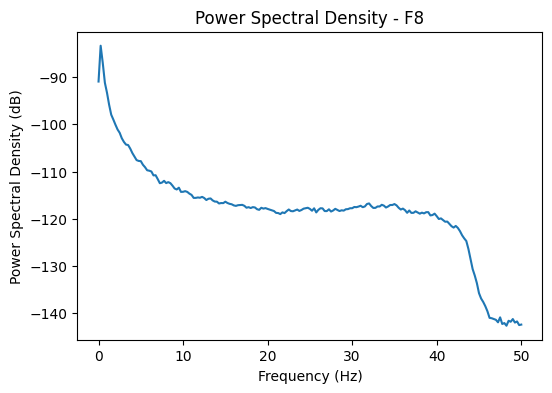

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.000 (s)


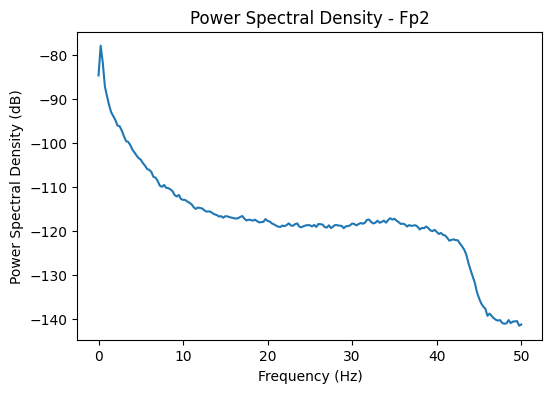

In [3]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# Read the EDF file
raw = mne.io.read_raw_edf('1.edf', preload=True)

# Define EEG channels for the Emotiv headset
eeg_channels = ['Cz', 'Fz', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5', 'FT9', 'T7', 
                'CP5', 'CP1', 'P3', 'P7', 'PO9', 'O1', 'Pz', 'Oz', 'O2', 'PO10', 
                'P8', 'P4', 'CP2', 'CP6', 'T8', 'FT10', 'FC6', 'C4', 'FC2', 'F4', 'F8', 'Fp2']

# Adjust parameters
fmin, fmax = 0, 50  # Maximum frequency adjusted for Emotiv headset
n_fft = 2**9  # FFT size (n_fft), ideally a power of 2

# Plot PSD for all EEG channels on one graph
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
for channel in eeg_channels:
    psd_result = raw.copy().pick_channels([channel]).compute_psd(fmin=fmin, fmax=fmax, n_fft=n_fft, n_jobs=1)
    psds, freqs = psd_result.data, psd_result.freqs
    plt.plot(freqs, 10 * np.log10(psds.T), label=channel)  # Transpose psds for correct plotting
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB)')
plt.title('Power Spectral Density - All EEG Channels')
plt.legend()
plt.show()

# Plot PSD for each EEG channel on separate graphs
for channel in eeg_channels:
    plt.figure(figsize=(6, 4))  # Adjust figure size if needed
    psd_result = raw.copy().pick_channels([channel]).compute_psd(fmin=fmin, fmax=fmax, n_fft=n_fft, n_jobs=1)
    psds, freqs = psd_result.data, psd_result.freqs
    plt.plot(freqs, 10 * np.log10(psds.T))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB)')
    plt.title(f'Power Spectral Density - {channel}')
    plt.show()
